In [1]:
!pip install ucimlrepo -q

In [2]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets




In [3]:
import os
from pathlib import Path

In [4]:
metadata_path = os.path.join('metadata.txt')

In [5]:
with open(metadata_path, 'w') as f:
    f.write(str(heart_disease.metadata))

In [6]:

print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [7]:
import pandas as pd


In [8]:
df = pd.DataFrame(X)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [12]:
target = pd.DataFrame(y)

In [13]:
target

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [14]:
target.value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13



## distribution of features and data clearning
lets take at the distribution of each feature and if their is any mising data we fill it and also do data clearning if needed before training our model

In [15]:
feature_columns = list(df.columns)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib
%matplotlib inline

In [ ]:
px.histogram(df, x=feature_columns[0],color='sex')

age looks like it has somehow normal distribution sex 0 mean male and 1 mean female it also look like we have more data for female than male
most of people have an age between 50 and 59 and decrease as we extend outwards

In [17]:
df['age'].isna().sum()

np.int64(0)

it also look like there are no mising value for age that cool

In [18]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [ ]:
px.histogram(df, x=feature_columns[0],color='cp')

we can also see the distribution of age and also the cp chest pain type
```
{
  1:'typical angina',
  2:'atypical angina',
  3:'non-anginal,
  4:'asymptomatic'
}


lets look at the distribution of blood pressure and if nessesary do some data clearning

In [19]:
df['trestbps'].isna().sum() # -> 0 , so there are no mising value that good

np.int64(0)

In [ ]:
px.histogram(df,x=feature_columns[3],color='sex',hover_data='cp')

the relxing blood pressure dont look great for many people ideal one should be 80 for Diastolic

In [20]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

lets now go to chol (serum cholesterol in mg/dl) column and do our things

In [21]:
df['chol'].isna().sum()

np.int64(0)

In [22]:
df['chol'].dtype

dtype('int64')

In [ ]:
px.histogram(df,x='chol')

In [23]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [24]:
df['fbs'].isna().sum()

np.int64(0)

In [25]:
df['fbs'].value_counts()

,count
fbs,
0,258
1,45


so fps is a categorical column with value of 0 or 1 so i need to get one hot encoding for this for my machine lerning model i will do it later when im generating my final preprocessing so that i can use the pipeline for preprocessing my data at one go

In [26]:
pd.get_dummies(df,columns=['fbs'])

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,fbs_0,fbs_1
0,63,1,1,145,233,2,150,0,2.3,3,0.0,6.0,False,True
1,67,1,4,160,286,2,108,1,1.5,2,3.0,3.0,True,False
2,67,1,4,120,229,2,129,1,2.6,2,2.0,7.0,True,False
3,37,1,3,130,250,0,187,0,3.5,3,0.0,3.0,True,False
4,41,0,2,130,204,2,172,0,1.4,1,0.0,3.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,132,0,1.2,2,0.0,7.0,True,False
299,68,1,4,144,193,0,141,0,3.4,2,2.0,7.0,False,True
300,57,1,4,130,131,0,115,1,1.2,2,1.0,7.0,True,False
301,57,0,2,130,236,2,174,0,0.0,2,1.0,3.0,True,False


In [ ]:
px.histogram(df,x='age',color='fbs')

In [27]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [28]:
df['restecg'].isna().sum()

np.int64(0)

In [29]:
df['restecg'].value_counts()

,count
restecg,
0,151
2,148
1,4


In [ ]:
px.histogram(df,x='age',color='restecg')

In [30]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [31]:
df['thalach'].isna().sum()

np.int64(0)


thalach is the maximum heart rate reached it is a continous value not a categorical column and also there is no null on this column which is greate

In [32]:
df['exang'].isna().sum()

np.int64(0)

this is also a categorical column vaue is either true of false

In [33]:
df['exang'].value_counts()

,count
exang,
0,204
1,99


In [34]:
categorical_feature_columns = []

In [35]:
categorical_feature_columns.append('sex')
categorical_feature_columns.append('cp')
categorical_feature_columns.append('fbs')
categorical_feature_columns.append('restecg')
categorical_feature_columns.append('exang')

In [ ]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [36]:
df['oldpeak'].isna().sum()

np.int64(0)

In [38]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [39]:
df['slope'].isna().sum()

np.int64(0)

In [40]:
df['slope'].value_counts()

,count
slope,
1,142
2,140
3,21


In [41]:
categorical_feature_columns.append('slope')

In [42]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [44]:
df['ca'].isna().sum() # this contain null value i will drop them

np.int64(4)

In [45]:
df.dropna(subset=['ca'],inplace=True)

In [46]:
df['ca'].isna().sum()

np.int64(0)

In [47]:
df['ca'].value_counts()

,count
ca,
0.0,176
1.0,65
2.0,38
3.0,20


In [48]:
categorical_feature_columns.append('ca')

In [49]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [51]:
df['thal'].isna().sum()# also this contain some null value i will drop them


np.int64(2)

In [52]:
df.dropna(subset=['thal'],inplace=True)

In [54]:
df['thal'].isna().sum()

np.int64(0)

In [55]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


now my data dont have any null that great lets go

In [56]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [57]:
categorical_feature_columns.remove('slope')

In [58]:
categorical_feature_columns

['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca']

In [64]:
# let now do feature scaling for trainign the model
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [65]:
# lets see the collaration of each feature with anotehr using heat map
corr_matrix = df.corr()

<Axes: >

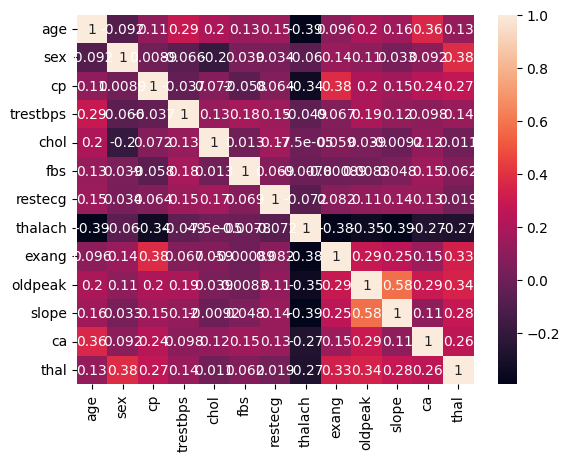

In [67]:
sns.heatmap(corr_matrix,annot=True)

In [68]:
# the visualizatio does not look great because feature are too many
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976


In [ ]:
""" lets do feature scalig before finding them to our model there is a problem i need to load again the data
and join it with target data and then drop null before continuie , i will do that in another notebook
"""